In [2]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, wiener, medfilt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import os


class RamanSpectrum:
    def __init__(self, filepath):
        # Read in the data from the file
        with open(filepath, 'r', encoding='iso-8859-1') as f:
            lines = f.readlines()
        
        # Extract the metadata from the file
        metadata = {}
        for line in lines:
        
            if line.startswith("#"):
                # Storing the metadata
                key, value = line.strip().split("=")
                metadata[key[1:]] = value
        
        # Extract the x and y data from the file
        data = np.loadtxt(lines[len(metadata):])
        self.x = data[:,0]
        self.y = data[:,1]
        
        # Store the metadata as object attributes
        self.metadata = metadata
    
    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.show()

#######################

# In this cell we collect the name of existing .txt files in a given directory

path = "roy/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)

['roy/02052023/roy_mg_r2_01.txt', 'roy/02052023/roy_mg_r2_04.txt', 'roy/02052023/roy_mg_r2_02.txt', 'roy/02052023/roy_mg_r2_05.txt', 'roy/02052023/roy_mg_r2_03.txt', 'roy/27042023/roy_mg_03.txt', 'roy/27042023/roy_mg_07.txt', 'roy/27042023/roy_mg_08.txt', 'roy/27042023/roy_mg_05.txt', 'roy/27042023/roy_mg_06.txt', 'roy/27042023/roy_mg_04.txt', 'roy/27042023/roy_mg_09.txt', 'roy/27042023/roy_mg_10.txt']


In [3]:

path = "raman_2/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)

['raman_2//Si_nano_muestra 3_25.txt', 'raman_2//Si_nano_muestra 3_16.txt', 'raman_2//Si_nano_muestra 3_63.txt', 'raman_2//Si_nano_muestra 3_01.txt', 'raman_2//Si_nano_muestra 3_64.txt', 'raman_2//Si_nano_muestra 3_31.txt', 'raman_2//Si_nano_muestra 3_46.txt', 'raman_2//Si_nano_muestra 3_59.txt', 'raman_2//Si_nano_muestra 3_57.txt', 'raman_2//Si_nano_muestra 3_38.txt', 'raman_2//Si_nano_muestra 3_62.txt', 'raman_2//Si_nano_muestra 3_48.txt', 'raman_2//Si_nano_muestra 3_37.txt', 'raman_2//Si_nano_muestra 3_34.txt', 'raman_2//Si_nano_muestra 3_33.txt', 'raman_2//Si_nano_muestra 3_17.txt', 'raman_2//Si_nano_muestra 3_65.txt', 'raman_2//Si_nano_muestra 3_52.txt', 'raman_2//Si_nano_muestra 3_32.txt', 'raman_2//Si_nano_muestra 3_60.txt']


In [4]:
r = RamanSpectrum(files[10])

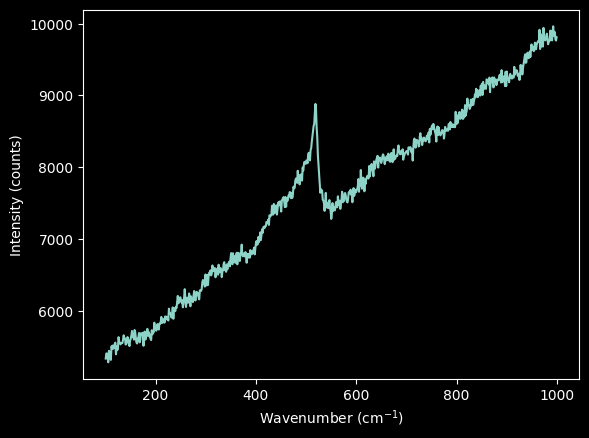

In [5]:
r.plot()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(y, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline


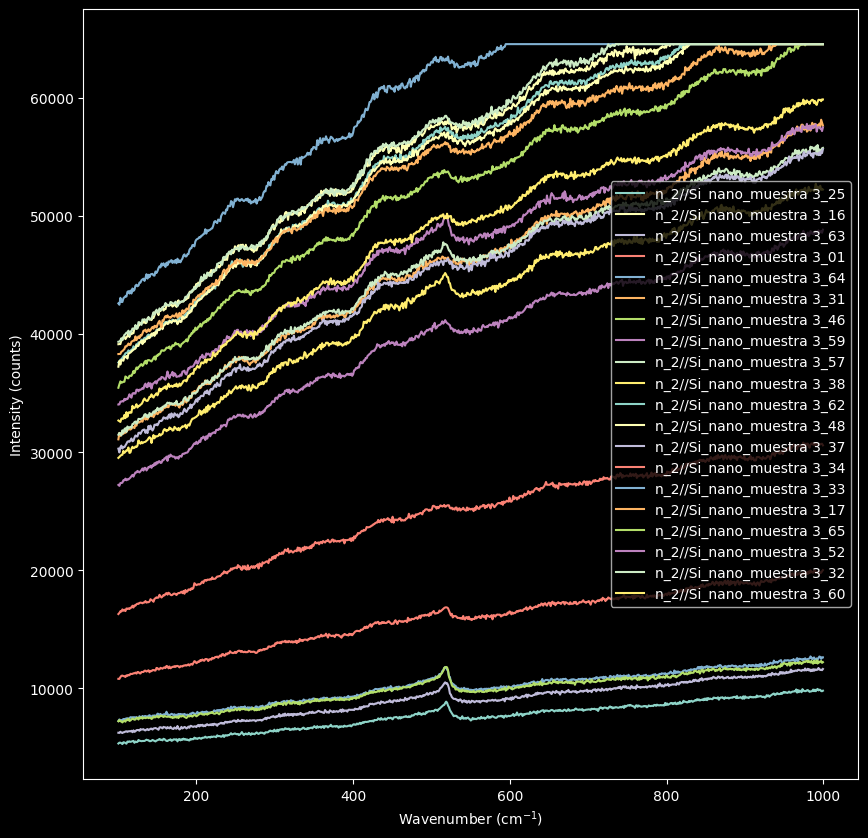

In [7]:
specs = []

for file in files:
    specs.append(RamanSpectrum(file))

xs = []
ys = []

for spec in specs:
    xs.append(spec.x)
    ys.append(spec.y)

plt.figure(figsize=(10,10))
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], label=files[i][4:-4])
plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Intensity (counts)")
plt.legend()
plt.show()

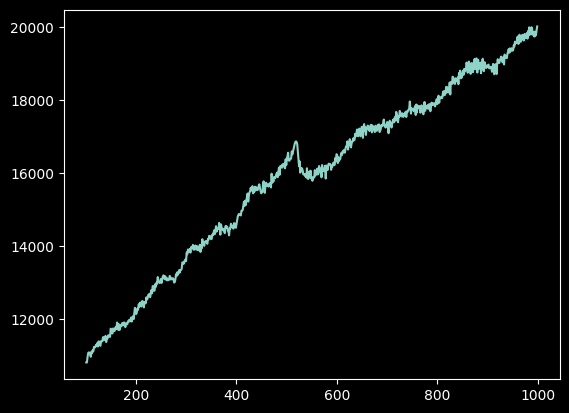

In [8]:
f

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown


def estimate_baseline(y, window_size=100, mode='mean'):
    if mode == 'mean':
        # Calculate the rolling mean as the baseline
        baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    elif mode == 'median':
        # Calculate the rolling median as the baseline
        baseline = np.median(y.reshape(-1, window_size), axis=1).repeat(window_size)
    else:
        raise ValueError("Invalid mode selected.")
    return baseline

def plot_signal_with_baseline_correction(window_size, mode):
    # Estimate the baseline
    baseline = estimate_baseline(y, window_size, mode)

    # Correct the signal by subtracting the baseline
    corrected_signal = y - baseline

    # Plot the original and corrected signals
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Original Signal')
    plt.plot(x, corrected_signal, label='Corrected Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Signal with Baseline Correction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Create an interactive slider for window size
window_size_slider = IntSlider(min=1, max=len(x), step=1, value=100, description='Window Size')

# Create a dropdown menu for mode selection
mode_dropdown = Dropdown(options=['mean', 'median'], value='mean', description='Mode')

# Create the interactive plot
interact(plot_signal_with_baseline_correction, window_size=window_size_slider, mode=mode_dropdown);


interactive(children=(IntSlider(value=100, description='Window Size', max=746, min=1), Dropdown(description='M…

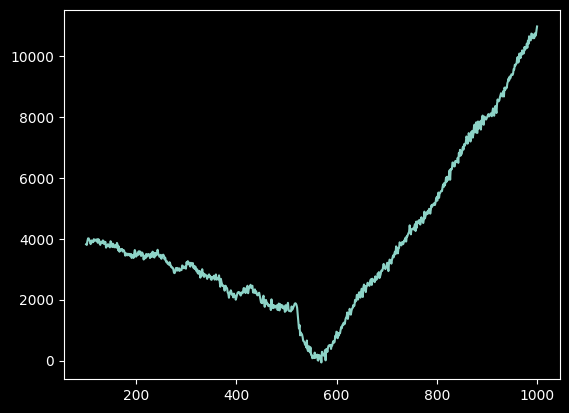

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(y, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline

def plot_signal_with_baseline_correction(window_size):
    # Estimate the baseline
    baseline = estimate_baseline(y, window_size)

    # Correct the signal by subtracting the baseline
    corrected_signal = y - baseline

    # Plot the original and corrected signals
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Original Signal')
    plt.plot(x, corrected_signal, label='Corrected Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Signal with Baseline Correction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Create an interactive slider for window size
window_size_slider = IntSlider(min=1, max=len(x), step=1, value=100, description='Window Size')

# Create the interactive plot
interact(plot_signal_with_baseline_correction, window_size=window_size_slider);


interactive(children=(IntSlider(value=100, description='Window Size', max=746, min=1), Output()), _dom_classes…

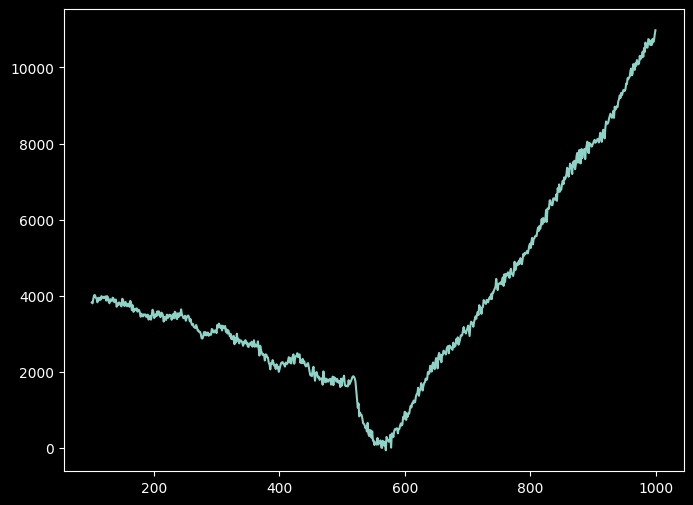

In [11]:
def estimate_baseline(y, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline

corrected_signal = y - estimate_baseline(y, x.size)

plt.figure(figsize=(8, 6))
plt.plot(x, corrected_signal, label='Original Signal')


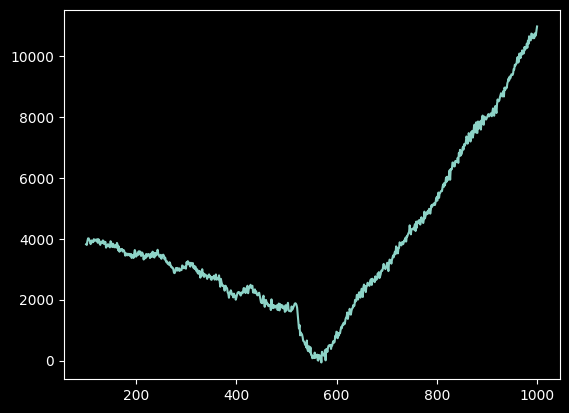

In [12]:


# Creating a new array which only contains the signal up to x= 2200

x_new = x[x<2200]
corrected_signal_new = corrected_signal[x<2200]

# Plotting the new signal

plt.plot(x_new, corrected_signal_new, label='Corrected Signal')

In [13]:
x, y = x_new, corrected_signal_new

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function as the sum of three Gaussian curves
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def multi_peak_fit(x, *params):
    num_peaks = len(params) // 3
    y_fit = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude, center, sigma = params[i*3 : (i+1)*3]
        y_fit += gaussian(x, amplitude, center, sigma)
    return y_fit

# Perform the multi-peak fitting
initial_guess = [100, 700, 80,
                500, 1400, 40, 
                800, 1600, 80]  # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
popt, pcov = curve_fit(multi_peak_fit, x, y, p0=initial_guess)

# Extract the optimized parameters
amplitudes = popt[0::3]
centers = popt[1::3]
sigmas = popt[2::3]

# Print the results

print('Amplitudes: {}'.format(amplitudes))
print('Centers: {}'.format(centers))
print('Sigmas: {}'.format(sigmas))

# Generate the fitted curve
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = multi_peak_fit(x_fit, *popt)

# Plot the original data and the fitted curve
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

In [ ]:
i = 4

r1 = RamanSpectrum(files[i])
files[i]

'roy/02052023/roy_mg_r2_03.txt'

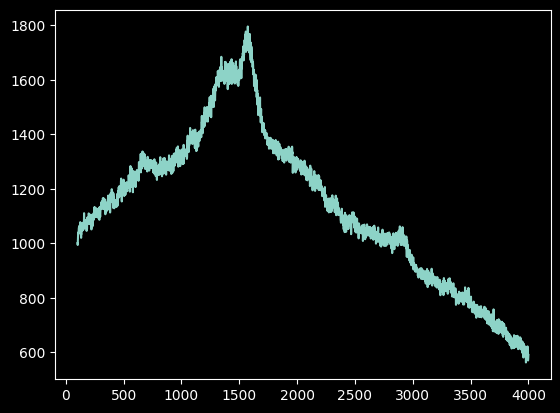

In [ ]:
x = r1.x
y = r1.y

plt.plot(x,y)

In [ ]:



#######################3


x = r1.x
y = r1.y

# Denoise the signal using three different methods
# y_savgol = savgol_filter(y, window_length=20, polyorder=1)
y_wiener = wiener(y)
y_medfilt = medfilt(y)


x1, x2 = min(x), max(x)
y1, y2 = min(y), max(y)

########################

def plot_functions(x_range, y_range, pord, wind):
    x = r1.x
    y_savgol = savgol_filter(y, window_length=wind, polyorder=pord)
    plt.plot(x, y, linestyle= '-', linewidth = 1 ,color='blue', label='Original')
    plt.plot(x, y_medfilt, linewidth = 4, color='green', label='Median Filter')
    plt.plot(x, y_wiener, linewidth = 2, color='yellow', label='Wiener')
    plt.plot(x, y_savgol, linewidth = 4, color='red', label='Savitzky-Golay')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()
    plt.show()

x_slider = widgets.FloatRangeSlider(
    value=[x1, x2],
    min=x1,
    max=x2,
    step=40,
    description='X range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

y_slider = widgets.FloatRangeSlider(
    value=[y1, y2],
    min=y1,
    max=y2,
    step=10,
    description='Y range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

pord_s = widgets.IntSlider(
    value=8,
    min=1,
    max=20,
    step=1,
    description='Pord:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

wind_s = widgets.IntSlider(
    value=20,
    min=2,
    max=50,
    step=1,
    description='Wind:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)


def update_plot(x_range, y_range, prange, wrange):
    plot_functions(x_range, y_range, prange, wrange)

interactive_plot = widgets.interactive_output(update_plot, {'x_range': x_slider, 'y_range': y_slider, 'prange': pord_s, 'wrange': wind_s})

display(widgets.VBox([x_slider, y_slider, pord_s, wind_s, interactive_plot]))


NameError: name 'r1' is not defined